# 07 - Ensambles de árboles de decisión

![](images/1.png)

## Módulo 6 - Aprendizaje de máquina supervisado
### Profesor: M.Sc. Favio Vázquez

In [1]:
from imports import *

En general los ensambles son métodos que combinan múltiples modelos de machine learning para crear modelos más poderosos. La unión de árboles de decisiones puede llevar a algunos modelos más avanzados, de los cuales veremos dos: random forest y gradient boosted trees.

## Random forest

Esencialmente son colecciones de árboles de decisiones, donde cada árbol es diferente al otro. La idea del modelo es que cada árbol puede predecir una porción de la información, pero puede sobreajustarse a otra parte de los datos. Entonces  construimos muchos árboles, los cuales algunos tendrán buena predicción y otros se sobreajustarán, podemos reducir la cantidad de sobreajuste **promediando** los resultados.

El nombre de random forest proviene de que en el modelo se inyecta aleatoriedad a los árboles para asegurar que cada árbol es diferente. 

* El parametro **oob_score** utiliza un arbol en otro bootstrap.
* Bootstrap es una técnica de resampling, para cada sampling (muestra) se crea un árbol de decisión.
* El parametro **n_jobs** es el número de trabajos en paralelo

## Ejemplo

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [3]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

En los problemas de clasificación hay que hacer **stratify = True** para mantener las proporciones

In [5]:
rf = RandomForestClassifier(n_estimators = 5, random_state=2)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

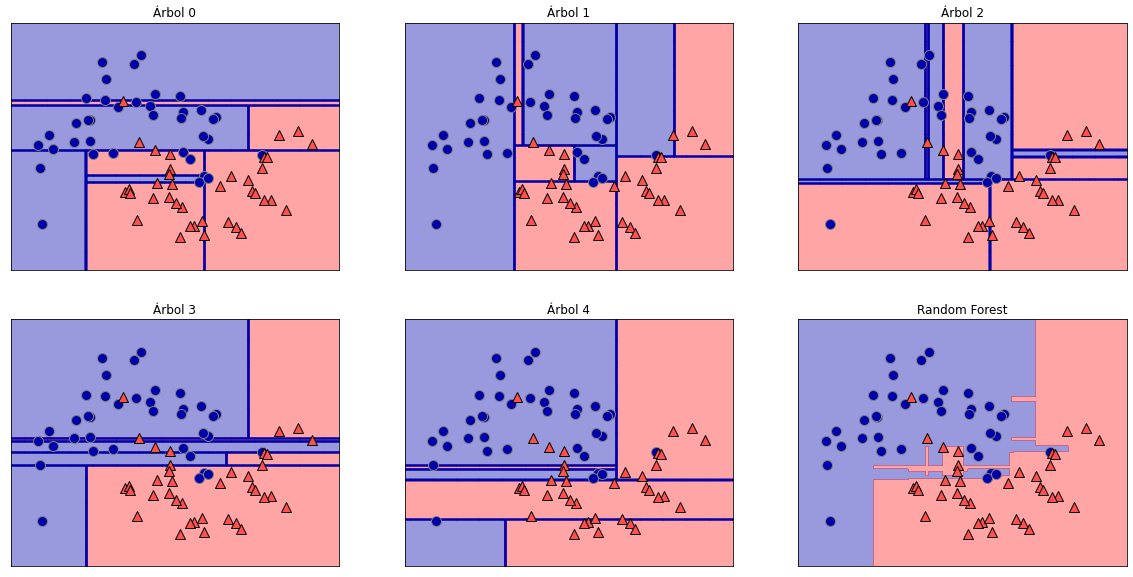

In [6]:
fig, axes = plt.subplots(2,3, figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(), rf.estimators_)):
    ax.set_title("Árbol {}".format(i))
    mglearn.plots.plot_tree_partition(X_train,y_train,tree,ax=ax)

mglearn.plots.plot_2d_separator(rf, X_train, fill=True, ax=axes[-1,-1],
                               alpha=0.4)

axes[-1,-1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

## Ejemplo

In [7]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=0)

In [21]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [22]:
# Accuracy del training
rf.score(X_train,y_train)

0.9976525821596244

In [23]:
# Accuracy del test
rf.score(X_test,y_test)

0.9440559440559441

In [24]:
def plot_feature_importance(df, model):
    n_features = df.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), df.feature_names)
    plt.xlabel("Importancia de las variables")
    plt.ylabel("Característica")
    plt.ylim(-1,n_features)
    plt.show()

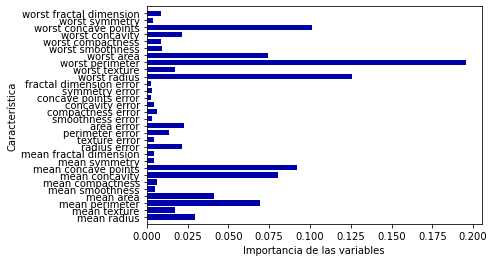

In [25]:
plot_feature_importance(cancer,rf)

## Gradient boosted trees

En contraste con el random forest, el gradient boosting funciona construyendo árboles de manera serial, donde cada árbol intenta corregir los errores de árbol anterior. Por defecto, no hay aleatoriedad en el proceso de los gradient boosted trees.

Este modelo comúnmente utiliza árboles pequeños, que hace que el modelo se ajuste más rápido y pueda hacer predicciones más rápido. Entonces la principal idea detrás de este modelo es la combinación de modelos simples, cada árbol provee una buena predicción de un pedazo de los datos, y al ir agregando árboles se mejora el perfomance iterativamente. 

* Fué el mejor algoritmo de predicción durante mucho tiempo, antes del deep learning
* Son más propensos a sobreajuste que Random Forest

In [26]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=0)

gbt = GradientBoostingClassifier(random_state=0) # 100 árboles con profundidad de 3
gbt.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [27]:
print("Accuracy training: ,", gbt.score(X_train,y_train))

Accuracy training: , 1.0


In [28]:
print("Accuracy test: ,", gbt.score(X_test,y_test))

Accuracy test: , 0.965034965034965


In [29]:
gbt = GradientBoostingClassifier(random_state=0, max_depth=1) 
gbt.fit(X_train,y_train)
print("Accuracy training: ,", gbt.score(X_train,y_train))
print("Accuracy test: ,", gbt.score(X_test,y_test))

Accuracy training: , 0.9906103286384976
Accuracy test: , 0.972027972027972


Al ser más cortos los árboles sobre ajusta menos

In [30]:
gbt = GradientBoostingClassifier(random_state=0, learning_rate=0.01) 
gbt.fit(X_train,y_train)
print("Accuracy training: ,", gbt.score(X_train,y_train))
print("Accuracy test: ,", gbt.score(X_test,y_test))

Accuracy training: , 0.9882629107981221
Accuracy test: , 0.965034965034965


No puedo optimizar el learning_rate y el max_depth. Con learning_rate cada árbol importa menos y hay menos sobreajuste

Accuracy training: , 0.9906103286384976
Accuracy test: , 0.972027972027972


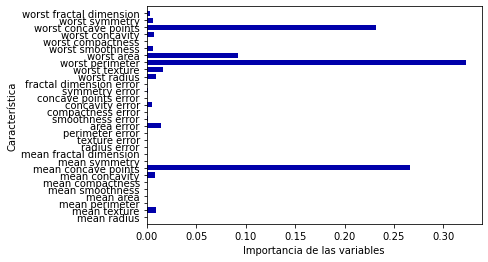

In [31]:
gbt = GradientBoostingClassifier(random_state=0, max_depth=1) 
gbt.fit(X_train,y_train)
print("Accuracy training: ,", gbt.score(X_train,y_train))
print("Accuracy test: ,", gbt.score(X_test,y_test))
plot_feature_importance(cancer,gbt)